In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('\nNumber of rows and columns in the Data set: ',df.shape)
print(' ')


Number of rows and columns in the Data set:  (1338, 7)
 


In [4]:
df.shape

(1338, 7)

Text(0.5, 1, 'Charges Vs BMI')

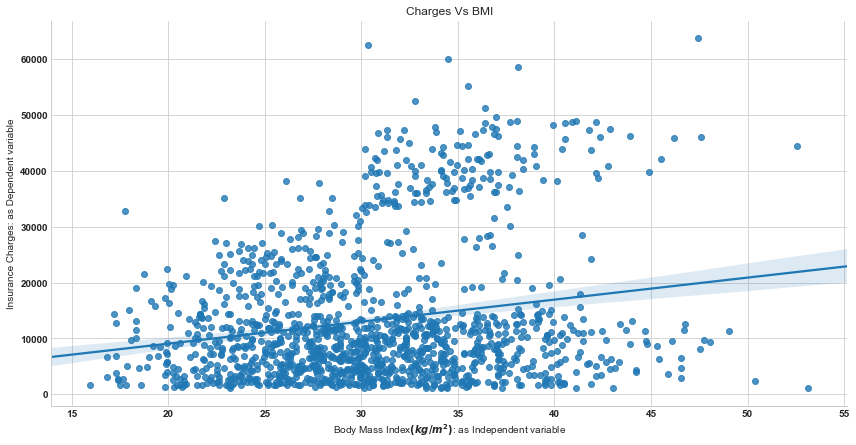

In [5]:
sns.lmplot(x='bmi',y = 'charges',data=df,aspect=2,height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charges Vs BMI')

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1, 'Missing Null Values in the Dataset')

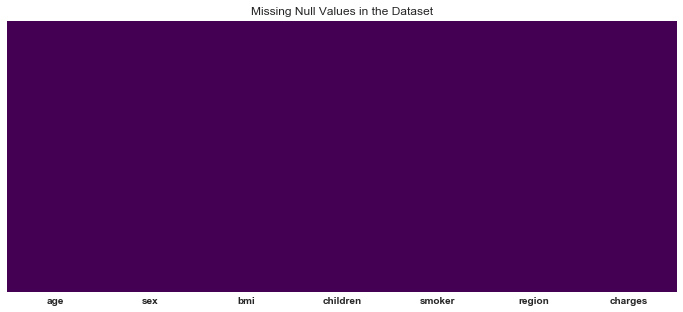

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing Null Values in the Dataset')

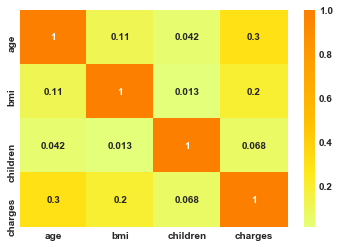

In [9]:
corr=df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

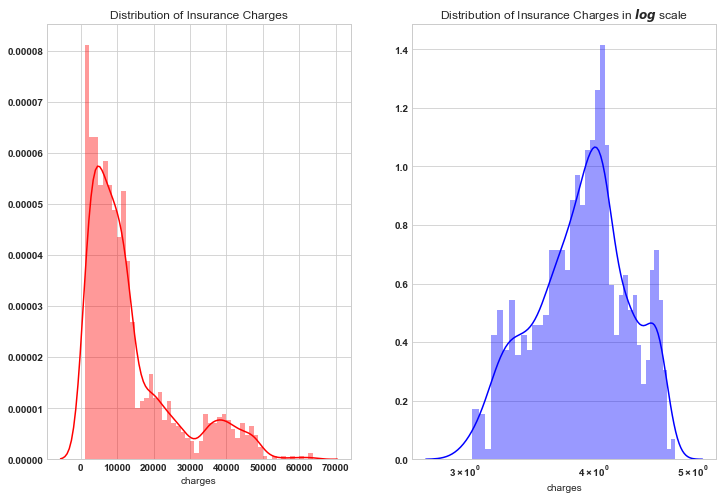

In [10]:
f=plt.figure(figsize=(12,8))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Insurance Charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Insurance Charges in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violinplot of Charges vs Smoker')

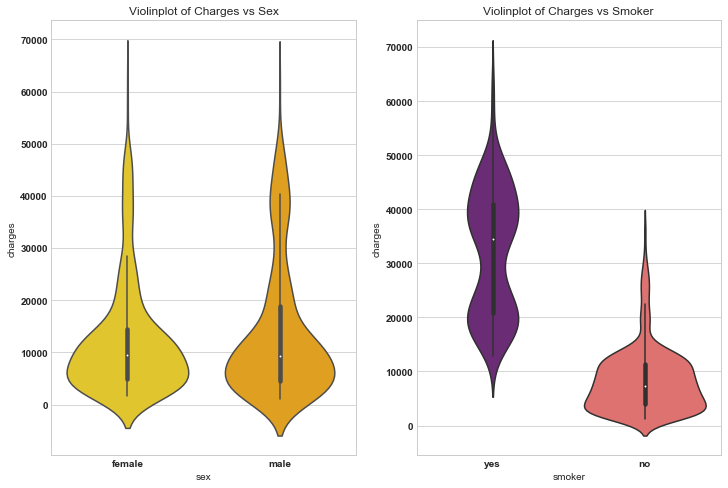

In [11]:
f=plt.figure(figsize=(12,8))
ax=f.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violinplot of Charges vs Sex')

ax=f.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violinplot of Charges vs Smoker')

Text(0.5, 1.0, 'Box Plot of Charges vs Gender Conatins smoker')

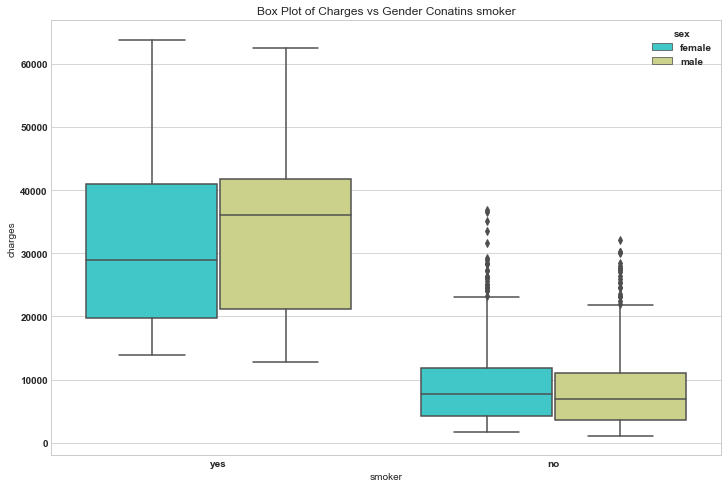

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x='smoker',y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box Plot of Charges vs Gender Conatins smoker')

Text(0.5, 1.0, 'Box Plot of Charges vs Gender children')

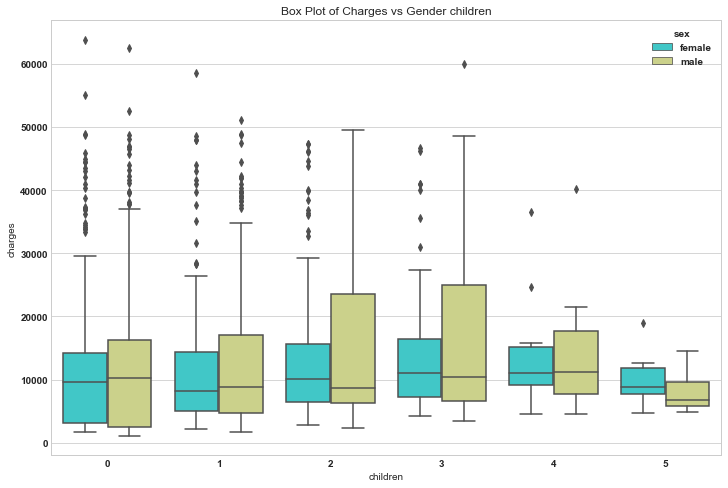

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='children',y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box Plot of Charges vs Gender children')

In [14]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Volinplot of Charges vs region')

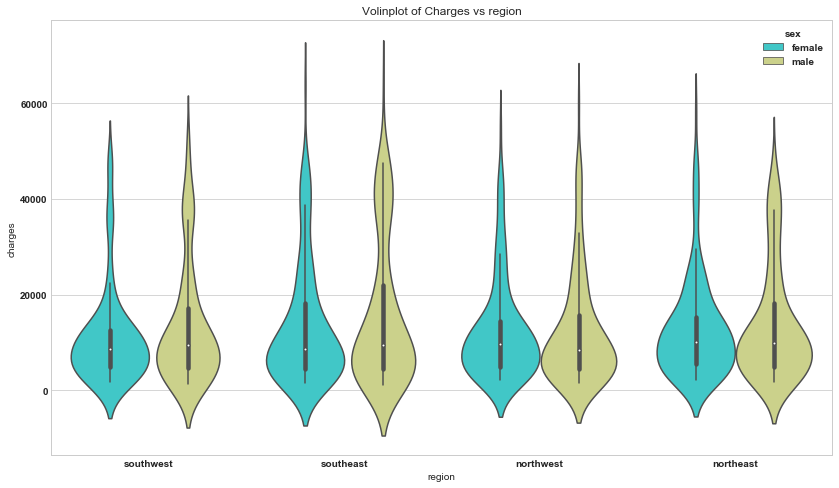

In [15]:
plt.figure(figsize=(14,8))
sns.violinplot(x='region',y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Volinplot of Charges vs region')

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

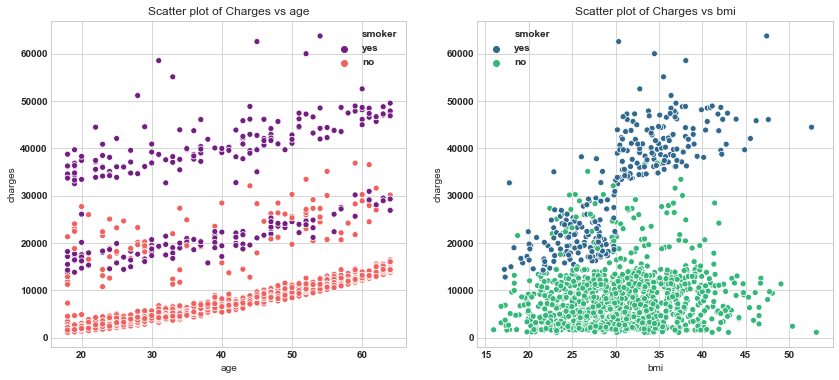

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')



In [17]:
categorical_columns = ['sex','children','smoker','region',]
df_encode = pd.get_dummies(data=df,prefix='OHE',prefix_sep='_',
                          columns=categorical_columns,
                          drop_first = True,
                           dtype='int8')

In [18]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumberof rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Numberof rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [19]:
from scipy.stats import boxcox
y_bc,lam,ci=boxcox(df_encode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [20]:
df_encode['charges'] = np.log(df_encode['charges'])

In [21]:
from sklearn.model_selection import train_test_split
x=df_encode.drop('charges',axis=1)
y=df_encode['charges']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)


In [22]:
x_train_0 = np.c_[np.ones((x_train.shape[0],1)),x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0],1)),x_test]

theta = np.matmul(np.linalg.inv(np.matmul(x_train_0.T,x_train_0)), np.matmul(x_train_0.T,y_train))

In [23]:
parameter = ['theta_'+str(i) for i in range(x_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(x.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


# Model Evaluation
Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
J(θ)=1m∑i=1m(y^i−yi)2
 
R2  is statistical measure of how close data are to the fitted regression line.  R2  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

R2=1−SSESST
 
SSE = Sum of Square Error
SST = Sum of Square Total
SSE=∑i=1m(y^i−yi)2
 
SST=∑i=1m(yi−y¯i)2
 
Here  y^  is predicted value and  y¯  is mean value of  y .

In [25]:
y_pred_norm = np.matmul(x_test_0,theta)

J_mse = np.sum((y_pred_norm - y_test)**2)/x_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())*2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R Square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298186
R Square obtain for normal equation method is : -47894052946408.086


In [28]:
# sklearn regression module
y_pred_sk = lin_reg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055318


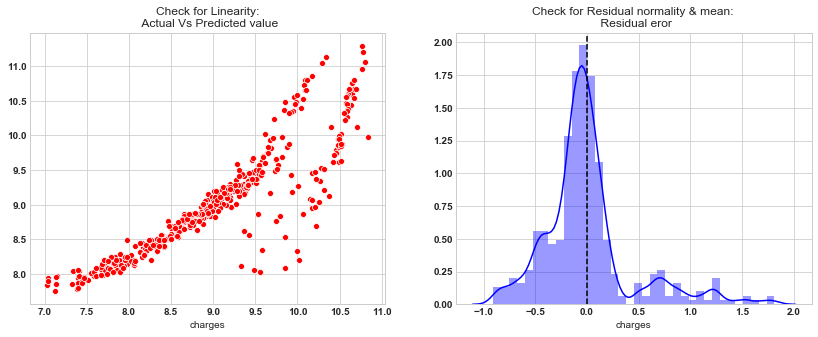

In [29]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

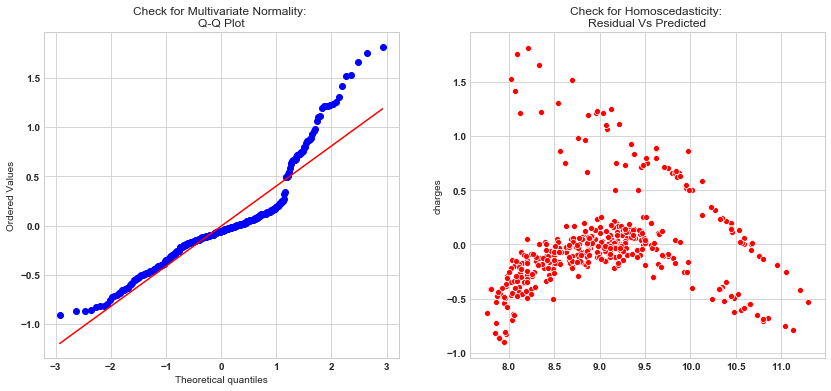

In [30]:
 #Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [31]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911135